### Universidad del Valle de Guatemala
## Facultad de Ingeniería
## Departamento de Ciencias de la Computación
## Curso: Security Data Science
# Juan Pablo Pineda
# Carnet: 19087

### Proyecto 2: Aprendizaje Continuo


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Analasis Exploratorio


In [2]:
df = pd.read_csv('Data/fraud_feature_engineering_example.csv')

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


In [3]:
missingValues = df.isnull().sum()
print("Valores faltantes por columna:")
print(missingValues)

Valores faltantes por columna:
trans_date_trans_time           0
cc_num                          0
merchant                        0
category                        0
amt                             0
first                           0
last                            0
gender                          0
street                          0
city                            0
state                           0
zip                             0
lat                             0
long                            0
city_pop                        0
job                             0
dob                             0
trans_num                       0
unix_time                       0
merch_lat                       0
merch_long                      0
is_fraud                        0
amt_month                       0
amt_year                        0
amt_month_shopping_net_spend    0
count_month_shopping_net        0
first_time_at_merchant          0
dtype: int64


In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.153689e+03,4.530560e+04,3.762028e+02,4.567241e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,3.909005e+03,3.586752e+04,7.253531e+02,4.575502e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.020000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,1.344790e+03,1.734142e+04,9.020000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,3.071990e+03,3.743910e+04,7.589000e+01,3.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.738470e+03,6.472088e+04,4.259800e+02,7.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,4.326189e+04,2.190868e+05,1.204718e+04,4.800000e+01


In [5]:
classDistribution = df['is_fraud'].value_counts()
print(classDistribution)

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


Nota: Dado que el dataset esta muy desbalanceado en cuanto al tipo de transacciones, teniendo una cantidad significativa de transacciones no fraudulentas respecto a las fraudulentas, se debe tener cuidado al manejar los datos ya que el modelo puede tender a clasificar todas las transacciones como no fraudulentas.

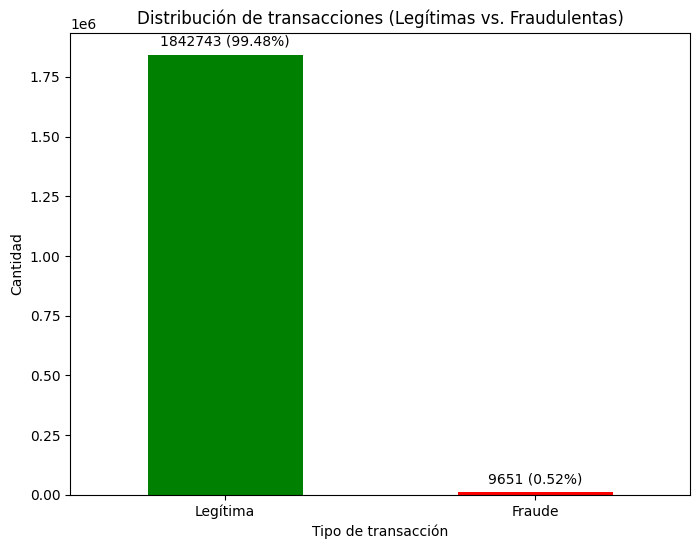

In [6]:

fraudCounts = df['is_fraud'].value_counts()
totalTransactions = fraudCounts.sum()

plt.figure(figsize=(8, 6))
fraudCounts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de transacciones (Legítimas vs. Fraudulentas)')
plt.xlabel('Tipo de transacción')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Legítima', 'Fraude'], rotation=0)


for i, count in enumerate(fraudCounts):
    plt.text(i, count + totalTransactions * 0.02, f"{count} ({count / totalTransactions:.2%})", ha='center')

plt.show()

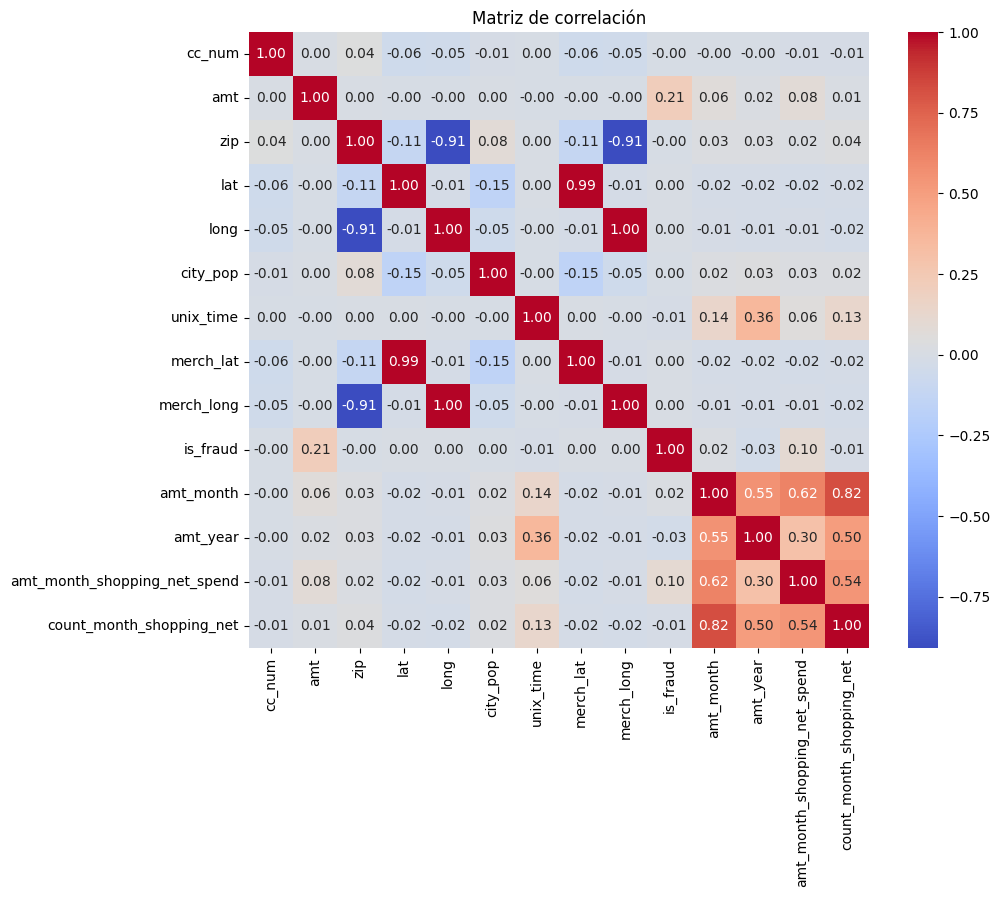

In [7]:
numericColumns = df.select_dtypes(include=['float64', 'int64'])

correlationMatrix = numericColumns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

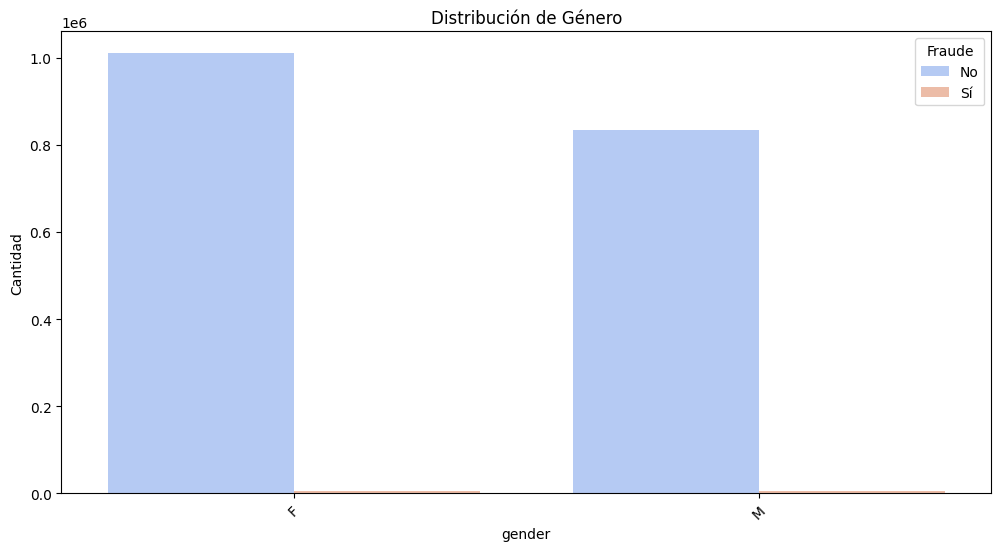

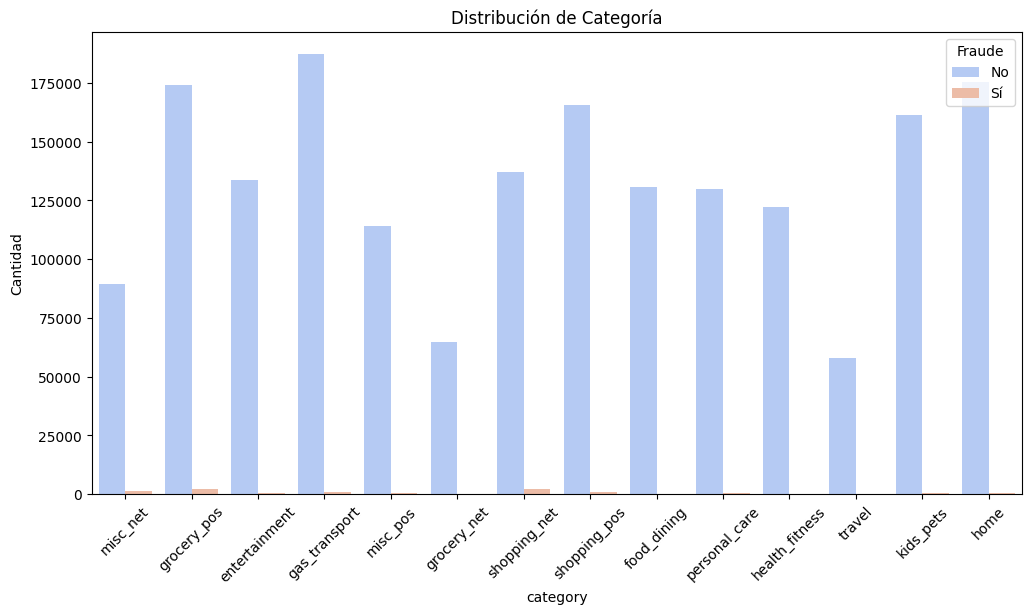

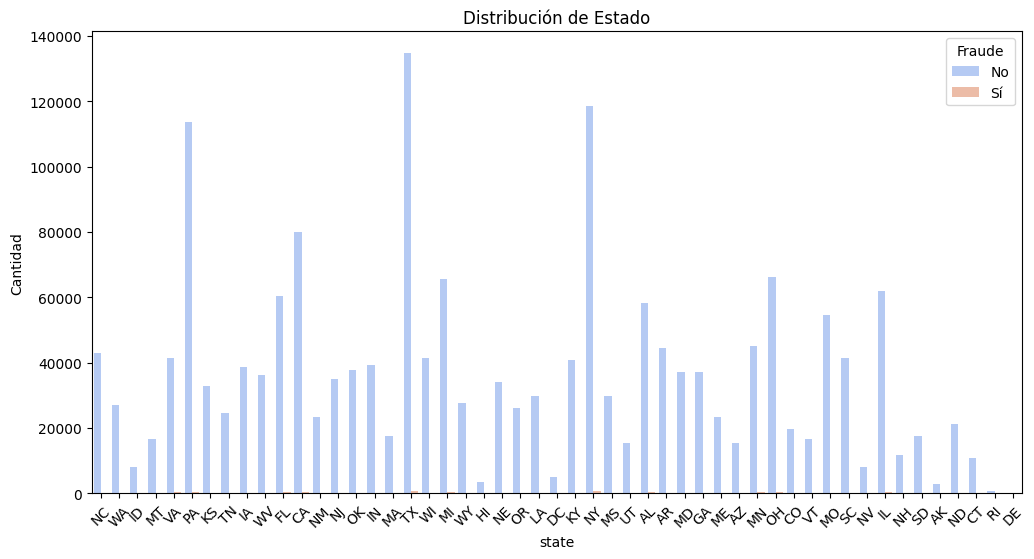

In [8]:
categories = ['gender', 'category', 'state'] 
CategoriesNames = ['Género', 'Categoría', 'Estado']

for column in categories:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, hue='is_fraud', palette='coolwarm')
    plt.title(f'Distribución de {CategoriesNames[categories.index(column)]}')
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Fraude', loc='upper right', labels=['No', 'Sí'])
    plt.show()

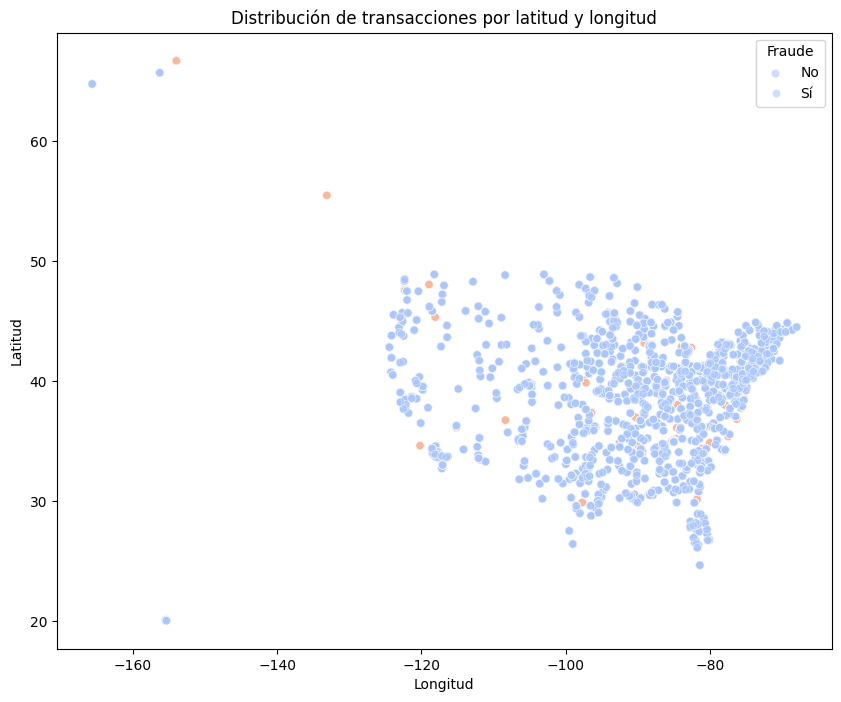

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='long', y='lat', hue='is_fraud', palette='coolwarm', alpha=0.6)
plt.title('Distribución de transacciones por latitud y longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Fraude', loc='upper right', labels=['No', 'Sí'])
plt.show()

#### Feature Engineering

Fecha

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Lunes=0, Domingo=6
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

df[['trans_date_trans_time', 'hour_of_day', 'day_of_week', 'month', 'year']].head()

,trans_date_trans_time,hour_of_day,day_of_week,month,year
0,2019-01-01 00:00:18,0,1,1,2019
1,2019-01-01 00:00:44,0,1,1,2019
2,2019-01-01 00:00:51,0,1,1,2019
3,2019-01-01 00:01:16,0,1,1,2019
4,2019-01-01 00:03:06,0,1,1,2019


Monto

In [11]:
avgTransactionAmtByCustomer = df.groupby('cc_num')['amt'].mean()
df['avg_transaction_amt'] = df['cc_num'].map(avgTransactionAmtByCustomer)

transactionCountByCustomer = df['cc_num'].value_counts()
df['transaction_count'] = df['cc_num'].map(transactionCountByCustomer)

stdTransactionAmtByCustomer = df.groupby('cc_num')['amt'].std()
df['std_transaction_amt'] = df['cc_num'].map(stdTransactionAmtByCustomer)

df[['amt', 'cc_num', 'avg_transaction_amt', 'std_transaction_amt', 'transaction_count']].head()

,amt,cc_num,avg_transaction_amt,std_transaction_amt,transaction_count
0,4.97,2703186189652095,89.408743,127.530101,2927
1,107.23,630423337322,56.078113,159.201852,4362
2,220.11,38859492057661,69.924272,116.688602,735
3,45.00,3534093764340240,80.090040,280.077880,743
4,41.96,375534208663984,95.341146,94.322842,2922


In [12]:
df['unique_merchants_visited'] = df.groupby('cc_num')['merchant'].transform('nunique')

df[['cc_num', 'merchant', 'unique_merchants_visited']].head()

,cc_num,merchant,unique_merchants_visited
0,2703186189652095,"fraud_Rippin, Kub and Mann",660
1,630423337322,"fraud_Heller, Gutmann and Zieme",681
2,38859492057661,fraud_Lind-Buckridge,431
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",423
4,375534208663984,fraud_Keeling-Crist,652


Localizacion

In [13]:
df['customer_merchant_distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)

df[['lat', 'long', 'merch_lat', 'merch_long', 'customer_merchant_distance']].head()

,lat,long,merch_lat,merch_long,customer_merchant_distance
0,36.0788,-81.1781,36.011293,-82.048315,0.872830
1,48.8878,-118.2105,49.159047,-118.186462,0.272310
2,42.1808,-112.2620,43.150704,-112.154481,0.975845
3,46.2306,-112.1138,47.034331,-112.561071,0.919802
4,38.4207,-79.4629,38.674999,-78.632459,0.868505


In [14]:
labelEncoder = LabelEncoder()

df['state'] = labelEncoder.fit_transform(df['state'])
df['gender'] = labelEncoder.fit_transform(df['gender'])
df['category'] = labelEncoder.fit_transform(df['category'])
df['first_time_at_merchant'] = labelEncoder.fit_transform(df['first_time_at_merchant'])

Limpieza de datos

In [15]:
variablesAEliminar = ['trans_date_trans_time','trans_num', 'first', 'last', 'street', 'city', 'merchant', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'job']

df = df.drop(variablesAEliminar, axis=1)

df.head()

,cc_num,category,amt,gender,state,zip,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,...,first_time_at_merchant,hour_of_day,day_of_week,month,year,avg_transaction_amt,transaction_count,std_transaction_amt,unique_merchants_visited,customer_merchant_distance
0,2703186189652095,8,4.97,0,27,28654,0,4.97,4.97,0.0,...,1,0,1,1,2019,89.408743,2927,127.530101,660,0.872830
1,630423337322,4,107.23,0,47,99160,0,107.23,107.23,0.0,...,1,0,1,1,2019,56.078113,4362,159.201852,681,0.272310
2,38859492057661,0,220.11,1,13,83252,0,220.11,220.11,0.0,...,1,0,1,1,2019,69.924272,735,116.688602,431,0.975845
3,3534093764340240,2,45.00,1,26,59632,0,45.00,45.00,0.0,...,1,0,1,1,2019,80.090040,743,280.077880,423,0.919802
4,375534208663984,9,41.96,1,45,24433,0,41.96,41.96,0.0,...,1,0,1,1,2019,95.341146,2922,94.322842,652,0.868505


In [16]:
df.to_csv('Data/processed.csv', index=False)

df.head()
df['year'].value_counts()

year
2020    927544
2019    924850
Name: count, dtype: int64